In [2]:
import nso_tif_kernel as nso_tif_kernel
import nso_tif_sampler as nso_tif_sampler
import nso_ds_cluster as nso_ds_cluster 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import itertools
from nso_ds_models import cluster_annotations_stats_model 
import glob
import joblib


ModuleNotFoundError: No module named 'nso_ds_classes'

In [22]:
for file in glob.glob("E:/data/coepelduynen/*ndvi_height.tif"):
    print(file.replace("\\","/"))

E:/data/coepelduynen/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200508_110812_SV1-01_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200625_112015_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200731_112003_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20200915_112329_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
E:/data/coepelduynen/20201231_105943_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.t

In [2]:
x_kernel_width = 32
y_kernel_height = 32


path_to_tif_file = "E:/data/coepelduynen/20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif"
tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_iterator_generator(path_to_tif_file, x_kernel_width , y_kernel_height)

# Try out sampler

In [5]:
a_nso_tif_sampler = nso_tif_sampler.nso_tif_sampler(tif_kernel_generator)

In [6]:
sample = a_nso_tif_sampler.sample_pixels(amount = 4000)
sample =np.array(sample)
sample.shape

(4000, 6)

In [13]:
sample[0][6]

IndexError: index 6 is out of bounds for axis 0 with size 6

In [25]:
sample = pd.DataFrame(sample, columns= ["band1","band2","band3","band4","band5","band6"])

In [29]:
MinMaxScaler().fit_transform(sample['band1'].values.reshape(-1,1))

array([[0.1694725 ],
       [0.1661055 ],
       [0.19304153],
       ...,
       [0.57463524],
       [0.24691358],
       [0.27497194]])

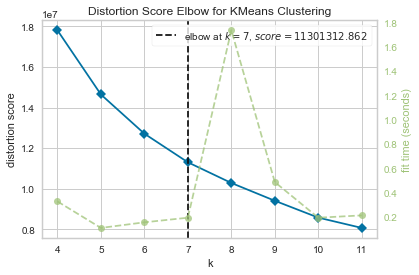

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(sample)        # Fit the data to the visualizer
visualizer.show() 

In [6]:
model = KMeans(n_clusters=visualizer.elbow_value_)

In [7]:
model.fit(sample).cluster_centers_

array([[ 408.26829268,  353.14634146,  252.65853659, 1028.40650407,
         154.38211382,   54.        ],
       [ 409.67916667,  353.65416667,  259.82083333,  848.65833333,
         135.2125    ,   19.05416667],
       [ 677.80392157,  702.89215686,  655.75490196,  989.02941176,
          50.66666667,    5.30392157],
       [ 461.33082707,  418.95488722,  344.65413534,  645.68421053,
          76.71428571,    8.85714286],
       [ 359.80487805,  289.75609756,  193.97560976,  482.        ,
         107.82926829,   41.70731707],
       [ 542.73770492,  523.92622951,  457.25409836,  872.90983607,
          79.02459016,    5.1557377 ],
       [ 395.45192308,  333.92307692,  242.91346154,  697.92788462,
         122.96153846,   20.70673077]])

# Clustering

In [3]:
a_nso_cluster_break = nso_ds_cluster.nso_cluster_break(tif_kernel_generator)

In [4]:
a_nso_cluster_break.make_clusters_centers(path_to_tif_file.split("/")[-1].split(".tif")[0]+"_cluster_centers.csv")

  0%|          | 0/1 [00:00<?, ?it/s]

-------
Part: 2 of 2
Total permutations this step: 15237021
Retrieving kernels:
Number of pixels:
15237021


  0%|          | 0/1 [03:30<?, ?it/s]


KeyboardInterrupt: 

  0%|          | 0/2 [00:00<?, ?it/s]

-------
Part: 1 of 2
Total permutations this step: 15237021
Retrieving kernels:
Number of pixels:
15237021


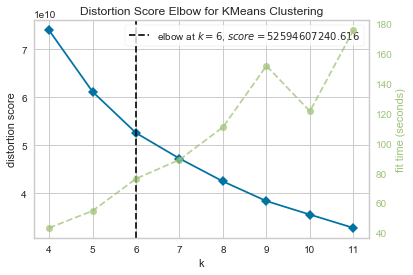

 50%|█████     | 1/2 [17:24<17:24, 1044.83s/it]

-------
Part: 2 of 2
Total permutations this step: 15237021
Retrieving kernels:
Number of pixels:
15237021


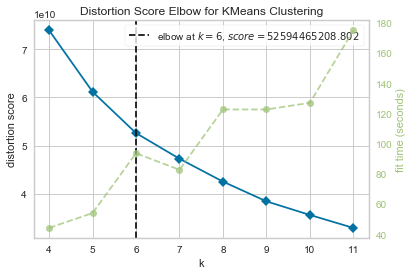

100%|██████████| 2/2 [34:37<00:00, 1038.76s/it]


In [5]:
cluster_centers = a_nso_cluster_break.retrieve_stepped_cluster_centers(parts=2)

In [7]:
cluster_centers

[array([[ 397.37767573,  334.89560288,  237.32863256, 1010.18104843,
          157.74593532,   90.0761633 ],
        [ 528.66864558,  506.28640927,  439.46534093,  830.86191418,
           77.85956119,    5.43000543],
        [ 350.20207523,  271.86410397,  175.32497464,  506.88073542,
          126.07716822,   63.76153001],
        [ 428.29270768,  376.00258733,  296.49759014,  644.43939527,
           93.80018732,    6.8818536 ],
        [ 663.46185512,  682.31138702,  635.11005237, 1004.30904578,
           56.64235135,    4.50023125],
        [ 400.18671956,  340.66116541,  246.82566338,  797.2093263 ,
          134.38862408,   29.39216817]]),
 array([[ 350.24296994,  271.91713676,  175.41266134,  505.62147433,
          125.85283457,   63.64496601],
        [ 663.19786603,  681.96341802,  634.72358214, 1003.96094298,
           56.67673088,    4.50225615],
        [ 397.47895469,  335.0406772 ,  237.48275159, 1010.06257598,
          157.68249679,   89.84363603],
        [ 528.212

In [ ]:
# Add labels.

In [6]:
annotations_stats = pd.read_csv("C:/repos/waterleiding_annotaties/median_stats_annotations.csv")

In [7]:
annotations_stats

,Unnamed: 0,Unnamed: 0.1,Label,MEAN_height,MEDIAN_height,MEAN_ndvi,MEDIAN_ndvi,MEAN_band1,MEDIAN_band1,MEAN_band2,...,MEDIAN_band3,MEAN_band4,MEDIAN_band4,MEAN_band1_normalized,MEDIAN_band1_normalized,MEDIAN_band2_normalized,MEDIAN_band3_normalized,MEDIAN_band4_normalized,MEDIAN_height_normalized,MEDIAN_ndvi_normalized
0,0,6,"Water, Overig",33.681119,1,59.542520,43,382.018012,362,338.064206,...,191,228.930551,191,0.122672,0.026178,0.035461,0.000000,0.000000,0.000000,0.000000
1,1,2,Zand,13.342271,1,56.084952,51,551.205535,548,588.247318,...,513,514.976774,513,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.059701
2,2,1,Mos,9.031527,1,70.439476,70,472.028280,452,465.234426,...,354,386.487745,354,0.589424,0.497382,0.475177,0.506211,0.506211,0.000000,0.201493
3,3,5,Open laag struweel,19.814789,1,84.188820,85,439.180951,423,419.085477,...,311,335.791424,311,0.419093,0.345550,0.333333,0.372671,0.372671,0.000000,0.313433
4,4,4,Lage kruiden-gras,17.112904,1,89.680283,91,423.178573,412,400.410999,...,302,318.752655,302,0.336112,0.287958,0.294326,0.344720,0.344720,0.000000,0.358209
5,5,8,Dicht laag struweel,32.726436,33,96.099444,96,419.657661,412,392.187870,...,291,302.898087,291,0.317854,0.287958,0.280142,0.310559,0.310559,0.173913,0.395522
6,6,7,Hoge kruiden-gras,27.232926,21,99.836974,97,412.705271,409,388.424642,...,296,300.566245,296,0.281802,0.272251,0.287234,0.326087,0.326087,0.108696,0.402985
7,7,0,Heide,6.553915,1,100.129149,98,404.804143,407,369.751504,...,289,285.847669,289,0.240830,0.261780,0.251773,0.304348,0.304348,0.000000,0.410448
8,8,9,Open Duindoorn,37.356660,35,104.661932,104,411.211571,407,383.413253,...,287,293.139071,287,0.274056,0.261780,0.265957,0.298137,0.298137,0.184783,0.455224
9,9,11,Open Hoog Struweel,65.137206,71,111.494941,109,389.910388,391,355.641225,...,261,262.183000,261,0.163598,0.178010,0.202128,0.217391,0.217391,0.380435,0.492537


In [34]:
annotations_stats = annotations_stats[["MEDIAN_band1_normalized",	"MEDIAN_band2_normalized",	"MEDIAN_band3_normalized","MEDIAN_band4_normalized","MEDIAN_height_normalized","MEDIAN_ndvi_normalized", "Label"]]

In [35]:
annotations_stats 

,MEDIAN_band1_normalized,MEDIAN_band2_normalized,MEDIAN_band3_normalized,MEDIAN_band4_normalized,MEDIAN_height_normalized,MEDIAN_ndvi_normalized,Label
0,0.026178,0.035461,0.000000,0.000000,0.000000,0.000000,"Water, Overig"
1,1.000000,1.000000,1.000000,1.000000,0.000000,0.059701,Zand
2,0.497382,0.475177,0.506211,0.506211,0.000000,0.201493,Mos
3,0.345550,0.333333,0.372671,0.372671,0.000000,0.313433,Open laag struweel
4,0.287958,0.294326,0.344720,0.344720,0.000000,0.358209,Lage kruiden-gras
5,0.287958,0.280142,0.310559,0.310559,0.173913,0.395522,Dicht laag struweel
6,0.272251,0.287234,0.326087,0.326087,0.108696,0.402985,Hoge kruiden-gras
7,0.261780,0.251773,0.304348,0.304348,0.000000,0.410448,Heide
8,0.261780,0.265957,0.298137,0.298137,0.184783,0.455224,Open Duindoorn
9,0.178010,0.202128,0.217391,0.217391,0.380435,0.492537,Open Hoog Struweel


In [67]:
cluster_centers_1 = cluster_centers[1]

In [68]:
cluster_centers_df = pd.DataFrame(cluster_centers_1, columns =["band1","band2","band3","band4","band5","band6"])

In [69]:
cluster_centers_df['band1_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band1'].values.reshape(-1, 1) )
cluster_centers_df['band2_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band2'].values.reshape(-1, 1) )
cluster_centers_df['band3_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band3'].values.reshape(-1, 1) )
cluster_centers_df['band4_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band4'].values.reshape(-1, 1) )
cluster_centers_df['band5_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band5'].values.reshape(-1, 1) )
cluster_centers_df['band6_normalized'] =MinMaxScaler().fit_transform(cluster_centers_df['band6'].values.reshape(-1, 1) )

In [70]:
cluster_centers_df["labels"] =cluster_centers_df[['band1_normalized','band2_normalized','band3_normalized','band4_normalized','band5_normalized','band6_normalized']].apply\
    (lambda row_stuff:annotations_stats['Label'][annotations_stats[["MEDIAN_band1_normalized","MEDIAN_band2_normalized","MEDIAN_band3_normalized","MEDIAN_band4_normalized","MEDIAN_height_normalized","MEDIAN_ndvi_normalized"]].apply(lambda x:euclidean_distance_kernels(row_stuff,x.values),axis=1).idxmin()], axis=1
)

In [27]:
def euclidean_distance_kernels(kernel_x, kernel_y):
    return np.sum(np.abs(kernel_x - kernel_y))

In [71]:
cluster_centers_df

,band1,band2,band3,band4,band5,band6,band1_normalized,band2_normalized,band3_normalized,band4_normalized,band5_normalized,band6_normalized,labels
0,350.242970,271.917137,175.412661,505.621474,125.852835,63.644966,0.000000,0.000000,0.000000,0.000000,0.684873,0.693013,Loofbos
1,663.197866,681.963418,634.723582,1003.960943,56.676731,4.502256,1.000000,1.000000,1.000000,0.987904,0.000000,0.000000,Zand
2,397.478955,335.040677,237.482752,1010.062576,157.682497,89.843636,0.150935,0.153942,0.135137,1.000000,1.000000,1.000000,Loofbos
3,528.212864,505.698926,438.800998,830.355470,77.965623,5.437814,0.568676,0.570135,0.573442,0.643750,0.210769,0.010963,Mos
4,399.977121,340.379691,246.510443,796.947127,134.476987,29.566044,0.158918,0.166963,0.154792,0.577522,0.770256,0.293689,Open Hoog Struweel
5,428.178830,375.854975,296.326612,644.478269,93.870445,6.899868,0.249032,0.253478,0.263251,0.275269,0.368234,0.028094,Open Duindoorn


In [66]:
cluster_centers_df.to_csv("cluster_stats_labels.csv")

In [2]:
a_cluster_annotations_stats_model = cluster_annotations_stats_model()

In [6]:
a_cluster_annotations_stats_model.predict(tif_kernel_generator.get_pixel_value(5159,1111))

'Loofbos'

In [9]:
annotations = pd.read_csv("cluster_stats_labels.csv")

In [12]:
annotations

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band1_normalized,band2_normalized,band3_normalized,band4_normalized,band5_normalized,band6_normalized,labels
0,0,397.377676,334.895603,237.328633,1010.181048,157.745935,90.076163,0.150596,0.153568,0.134854,1.000000,1.000000,1.000000,Loofbos
1,1,528.668646,506.286409,439.465341,830.861914,77.859561,5.430005,0.569708,0.571139,0.574487,0.643713,0.209856,0.010865,Mos
2,2,350.202075,271.864104,175.324975,506.880735,126.077168,63.761530,0.000000,0.000000,0.000000,0.000000,0.686769,0.692500,Loofbos
3,3,428.292708,376.002587,296.497590,644.439395,93.800187,6.881854,0.249284,0.253720,0.263542,0.273313,0.367522,0.027831,Open Duindoorn
4,4,663.461855,682.311387,635.110052,1004.309046,56.642351,4.500231,1.000000,1.000000,1.000000,0.988333,0.000000,0.000000,Zand
5,5,400.186720,340.661165,246.825663,797.209326,134.388624,29.392168,0.159563,0.167615,0.155509,0.576850,0.768976,0.290875,Open Hoog Struweel


In [3]:
scaler = joblib.load("./scalers/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif_band3.save")

In [10]:
scaler.transform(np.array(900).reshape(-1,1))

array([[1.31301483]])

# Check correct clustering

In [3]:
import nso_ds_classes.nso_tif_kernel as nso_tif_kernel
import nso_ds_classes.nso_tif_sampler as nso_tif_sampler
import nso_ds_classes.nso_ds_cluster as nso_ds_cluster 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import itertools
from nso_ds_classes.nso_ds_models import cluster_annotations_stats_model 
import glob
import joblib
from nso_ds_classes.nso_ds_cluster import normalize_scaler_class_BNDVIH 

In [4]:
x_kernel_width = 32
y_kernel_height = 32


path_to_tif_file = "E:/data/coepelduynen/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif"
tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_iterator_generator(path_to_tif_file, x_kernel_width , y_kernel_height)

In [6]:
a_cluster_annotations_stats_model = cluster_annotations_stats_model()

a_normalize_scaler_class_BNDVIH = normalize_scaler_class_BNDVIH( "./scalers/"+path_to_tif_file.split("/")[-1]+"_band3.save", \
                                                                            scaler_file_band5 = "./scalers/"+path_to_tif_file.split("/")[-1]+"_band5.save", \
                                                                            scaler_file_band6 = "./scalers/ahn4.save")

In [55]:
pixel_value = tif_kernel_generator.get_pixel_value(tif_kernel_generator.get_x_y(88921.05,471846.07)[0], tif_kernel_generator.get_x_y(88921.05,471846.07)[1])

In [56]:
pixel_value

[482, 535, 436, 581, 36, 1]

In [58]:
pixel_value  = pd.DataFrame([pixel_value,pixel_value], columns= ["band1","band2","band3","band4","band5","band6"])

In [59]:
pixel_value

,band1,band2,band3,band4,band5,band6
0,482,535,436,581,36,1
1,482,535,436,581,36,1


In [60]:
pixel_value = a_normalize_scaler_class_BNDVIH.transform(pixel_value)

In [65]:
pixel_value = pixel_value*10

In [77]:
pixel_value[0:1].values[0]

array([4.82000000e+03, 5.35000000e+03, 5.48599671e+00, 5.81000000e+03,
       1.41176471e+00, 3.92156863e-02])

In [78]:
[pixel_value[0:1].values[0][2],pixel_value[0:1].values[0][4],pixel_value[0:1].values[0][5]]

[5.485996705107085, 1.4117647058823528, 0.0392156862745098]

In [79]:
a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([pixel_value[0:1].values[0][2],pixel_value[0:1].values[0][4],pixel_value[0:1].values[0][5]]))

'Zand'

In [2]:
def euclidean_distance_kernels(kernel_x, kernel_y):
    return np.sum(np.abs(kernel_x - kernel_y))

In [9]:
euclidean_distance_kernels(np.array([0.54859967,0.14117647,0.00392157]), np.array([0.8, 0, 0]))

0.69369771

In [14]:
band3_scaler  = joblib.load("./scalers/"+path_to_tif_file.split("/")[-1]+"_band3.save")

In [17]:
band3_scaler.transform(pixel_value[2].reshape(-1,1))[0][0]

0.5485996705107085

#  Test eud performance

In [41]:
def euclidean_distance_kernels(kernel_x, kernel_y):
    return np.sum(np.abs(kernel_x - kernel_y))

In [28]:
euclidean_distance_kernels_v = np.vectorize(euclidean_distance_kernels)

In [58]:
example_point = np.array(np.array(([ 0.5, 0.3,0.8]))*10, dtype=np.int16)

In [59]:
example_point

array([5, 3, 8], dtype=int16)

In [66]:
cluster_centers = pd.read_csv("./cluster_centers/normalized_5_BHNDVI_cluster_centers.csv")

In [74]:
cluster_centers = cluster_centers[["band3","band5","band6"]]*10

In [76]:
np.array(cluster_centers.values, dtype= np.int16)

array([[  0, 100, 100],
       [ 20,  70,  30],
       [ 30,  50,  10],
       [ 30,  45,   0],
       [  0,   0,   0],
       [ 70,   0,   0]], dtype=int16)

In [64]:
np.argmin([euclidean_distance_kernels(x,example_point) for x in cluster_centers ])

2

In [48]:
cluster_centers = np.array((cluster_centers[["band3","band5","band6"]].values*10),dtype=np.int16)

In [51]:
[x for  x in cluster_centers]

[array([ 0, 10, 10], dtype=int16),
 array([2, 7, 3], dtype=int16),
 array([3, 5, 1], dtype=int16),
 array([3, 4, 0], dtype=int16),
 array([0, 0, 0], dtype=int16),
 array([7, 0, 0], dtype=int16)]

In [29]:
euclidean_distance_kernels_v(cluster_centers)

array([[  0, 300, 300],
       [ 60, 210,  90],
       [ 90, 150,  30],
       [ 90, 120,   0],
       [  0,   0,   0],
       [210,   0,   0]])

In [ ]:
#normal .py file

import nso_ds_classes.nso_tif_kernel_iterator as nso_tif_kernel_iterator
import nso_ds_classes.nso_ds_models as nso_ds_models
import nso_ds_classes.nso_tif_sampler as nso_tif_sampler
import nso_ds_classes.nso_ds_cluster as nso_ds_cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np



x_kernel_width = 32
y_kernel_height = 32


path_to_tif_file = "E:/data/coepelduynen/20200625_112015_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif"
tif_kernel_generator = nso_tif_kernel_iterator.nso_tif_kernel_iterator_generator(path_to_tif_file, x_kernel_width , y_kernel_height)

a_nso_cluster_break = nso_ds_cluster.nso_cluster_break(tif_kernel_generator)
a_nso_cluster_break.retrieve_stepped_cluster_centers()